# Finding DnaA Boxes for Salmonella Enterica from the genome

### Background and Introduction

In this notebook, we will try to locate candidates for DnaA boxes of the Salmonella Enterica genome. 

The DnaA box, a conserved DNA sequence motif, plays a pivotal role in the initiation of DNA replication in bacterial genomes. This short and specific sequence is recognized by the DnaA protein, a key initiator of chromosomal replication. The DnaA protein's binding to the DnaA box triggers the initiation of DNA unwinding at the origin of replication (OriC), facilitating the formation of the replication fork and subsequent duplication of the bacterial genome.

The OriC, the site where DNA replication begins, is a critical region that ensures the accurate and timely duplication of the genetic material during cell division. The precise recognition and binding of the DnaA protein to the DnaA box are essential steps in the initiation of this fundamental biological process. The cooperative action of DnaA proteins at the DnaA boxes initiates the unwinding of the DNA double helix, allowing other replication machinery to join and synthesize new DNA strands.

Understanding the DnaA box and its role in the initiation of DNA replication are crucial for unraveling the mechanisms that govern genome duplication in bacteria. Insights into these processes not only contribute to our fundamental understanding of cellular biology but also hold significance for potential applications in areas such as antibiotic development and bacterial control strategies. In this context, exploring the presence and characteristics of the DnaA box in the Salmonella enterica genome becomes a valuable endeavor to decipher the intricate machinery governing DNA replication in this bacterial species.

### Importing libraries and genome

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from Skew_i import FindSkew
from FindOri import FindOri
from FreqWordsWithMM_RC import FreqWordsWithMMRC
from ApproximatePatternCount import ApproximatePatternCount
from ReverseComplement import ReverseComplement
print('Imported functions and packages.')

Imported functions and packages.


In [ ]:

# Let's import and read the DNA file
with open('Salmonella_enterica.txt', 'r') as f:
    lines=f.readlines()
genome=''
# 1st line is FASTA header, we concatenate all the others
for i in range(1,len(lines)):
    genome+=lines[i].strip()
print('Successfully read file.')

### Finding the Ori

A good first step when trying to locate DnaA boxes is to try to find the Ori. Traditionally speaking, this is done experimentally by selectively removing pieces of DNA, using techniques such as restriction enzyme digestion or other molecular biology methods. When the Ori is removed, the cell will stop replicating, and the biologist will know that he has removed the Ori (or at least part of it). 

However, doing it experimentally is resource and time intensive. Finding computational methods can make it faster, thus increasing the rate at which we can find Ori for new genomes. 

To understand how finding the approximate region of the Ori can be done compuationally, we need to have an idea of how the DNA replication process works.
As illustrated in the figure below, the two complementary DNA strands running in opposite directions around a circular chromosome unravel, starting at ori. As the strands unwind, they create two replication forks, which expand in both directions around the chromosome until the strands completely separate at the replication terminus (denoted ter). The replication terminus is located roughly opposite to ori in the chromosome. However, the enzyme responsible for DNA replication, DNA polymerase, can only read DNA in the 3'-->5' direction. This causes the process to be asymetric. Indeed, there will be a reverse half-strand and a forward half-strand. In the forward (lagging) half-strand, there will be a significant amount of time during which the DNA will stay single stranded.

<p align="center">
  <img src="Image2.png" alt="Image 2" width="500"/>
</p>

Single-stranded DNA increases the rate of mutation of C to T. By computing the skew (freq(G)-freq(C)), we can have an idea of where the ori might be: when the skew changes from decreasing to increasing, this is significant evidence that the Ori might be located there. 

<p align="center">
  <img src="Image3.png" alt="Image 3" width="500"/>
</p>

Computed skew of genome.


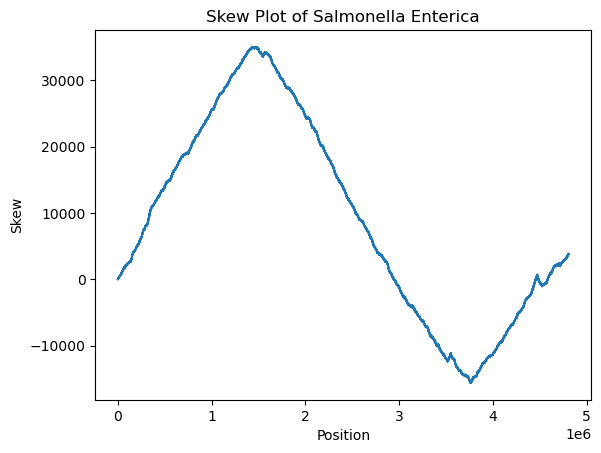

In [4]:
skew=FindSkew(genome=genome)
print('Computed skew of genome.')
# Create a line plot
sns.lineplot(x=range(len(skew)), y=skew)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Skew')
plt.title('Skew Plot of Salmonella Enterica')

# Show the plot
plt.show()

min_skew=FindOri(genome)
ori_pos=min_skew[0]

There is a clear candidate for the Ori region (around 3.7-3.8 million)

### Finding DnaA Box candidates.

Once we have an approximate idea of where the Ori region might be located, we can try to see if we find clumps of k-mers (usually clumps of >3  9-mers with up to 1 mismatch). 

In [5]:
# Starting with 9-mers with 1 mismatch
k9mers=FreqWordsWithMMRC(text=genome[ori_pos-500:], k=9, d=1)
print(k9mers)

['CGCCAGCGC', 'GCGCTGGCG']


These are the most frequent 9-mers (with one mismatch). Interestingly, they are reverse complements, which is promising. 
If they are located around the ori region, this would be strong evidence that they might be DnaA box sequences.  

In [62]:
ori_region=genome[ori_pos-500: ori_pos+1500]
kmer1='CGCCAGCGC'
kmer2='GCGCTGGCG'

count1=ApproximatePatternCount(ori_region, kmer=kmer1, d=1)
count2=ApproximatePatternCount(ori_region, kmer=kmer2, d=1)

print(count1, count2)


0 4


They are however not in close proximity of the ori (or each other). And both candidates are not both present in each strand (one is present in one, the other in the RC).
Let's narrow our 'most frequent' search to a smaller region close to the Ori. Ori regions vary in size from 200 to 1000 base pairs. 

In [58]:
k9mers=FreqWordsWithMMRC(text=genome[ori_pos+450:ori_pos+1000], k=9, d=1)
print(k9mers)

['GAAGATCTT', 'AAGATCTTC']


In [59]:
ori_region=genome[ori_pos+450: ori_pos+975]

kmer1='GAAGATCTT'
kmer2='AAGATCTTC'

count1=ApproximatePatternCount(ori_region, kmer=kmer1, d=1)
count2=ApproximatePatternCount(ori_region, kmer=kmer2, d=1)

print(count1, count2)

3 2


These could make good candidates. They are reverse complements, and are present 3 and 2 times respectively in a 525-base clump. These signs are characteristic of DnaA boxes. 

Let's try to look at others.

In [53]:
k9mers=FreqWordsWithMMRC(text=genome[ori_pos-250:ori_pos+250], k=9, d=1)
print(k9mers)

['CCGGAAGCT', 'AGCTTCCGG']


In [61]:
ori_region=genome[ori_pos-250: ori_pos+250]

kmer1='CCGGAAGCT'
kmer2='AGCTTCCGG'

count1=ApproximatePatternCount(ori_region, kmer=kmer1, d=1)
count2=ApproximatePatternCount(ori_region, kmer=kmer2, d=1)

print(count1, count2)

2 3


These are also good candidates, with 2 and 3 repeats in a 500-base clump. 

One could then verify these experimentally to check which of these stop the DNA replication process if removed. 